In [237]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt

First you generate simulated x and y coordinates. Each x and y pair corresponds to a patche's location. In the real application you can derived the x and y pair of coordinates from the affine matrix (top-left point) or from the bounding box. It doesn't matter which that point, as long as it's consistent for all patches (i.e., top-left for all patches or top-right for all patches etc.)

In [238]:
px_size = 10 # pixel size in meters (10m for Sentinel-2)
x_N = 22 # Number of patches in longitude (x) direction
y_N = 18 # Number of patches in the latitude (y) direction
patch_width = 128 # patch width in pixels
patch_height = 128 # patch height in pixels

# Generate the x and y
x = np.linspace(0, patch_width*px_size*(x_N-1), x_N)  # x_N points from 0 to ...
y = np.linspace(0, patch_height*px_size*(y_N-1), y_N)  # y_N points from 0 to ...

x, y

(array([    0.,  1280.,  2560.,  3840.,  5120.,  6400.,  7680.,  8960.,
        10240., 11520., 12800., 14080., 15360., 16640., 17920., 19200.,
        20480., 21760., 23040., 24320., 25600., 26880.]),
 array([    0.,  1280.,  2560.,  3840.,  5120.,  6400.,  7680.,  8960.,
        10240., 11520., 12800., 14080., 15360., 16640., 17920., 19200.,
        20480., 21760.]))

In [239]:
# Create a meshgrid
x_grid, y_grid = np.meshgrid(x, y)

x_grid.shape, y_grid.shape

((18, 22), (18, 22))

In [240]:
# reshape to 1D
x_grid_ravel = x_grid.ravel()
y_grid_ravel = y_grid.ravel()

x_grid_ravel.shape, y_grid_ravel.shape

((396,), (396,))

In [241]:
# Stack column-wise
x_y_grid_ravel = np.column_stack((x_grid_ravel, y_grid_ravel))

x_y_grid_ravel.shape

(396, 2)

Here you select the index of the patch with `seed_index` and the number of patches to be selected for training with `N_n`

In [242]:
# Choose a seed patch (e.g., index 0)
seed_index = 120
# check index value
if seed_index < 0:
    seed_index = 0
elif seed_index >= x_y_grid_ravel.shape[0]:
    seed_index = x_y_grid_ravel.shape[0]-1

seed_point = x_y_grid_ravel[seed_index].reshape(1, -1)

# Select nearest neighbors (including the seed)
N_n = 60 # Number of neighbours to select for Training
nbrs = NearestNeighbors(n_neighbors=N_n, algorithm='ball_tree').fit(x_y_grid_ravel)
distances, indices = nbrs.kneighbors(seed_point)

# Get indices for training and test
train_indices = indices.flatten()
test_indices = np.setdiff1d(np.arange(x_y_grid_ravel.shape[0]), train_indices)

# print("Train indices:", train_indices)
# print("Test indices:", test_indices)

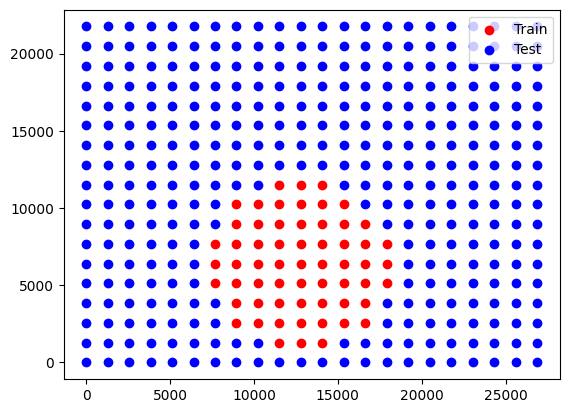

In [245]:
# Plot patches selected for training (red) and test (blue)
plt.scatter(x_grid_ravel[train_indices], y_grid_ravel[train_indices], color='red'); # plot train
plt.scatter(x_grid_ravel[test_indices], y_grid_ravel[test_indices], color='blue'); # plot test
plt.legend(['Train', 'Test']);